# Lab 1: KNN

Explore the data, implement a KNN algorithm and evaluate the results. This is the first lab, please select 6 random digits, this ID is your name for the rest of the course so please save it to use for other labs and exams. Submit this notebook to eclass with the name "lab1_123456.ipynb" and replace "123456" by your ID.

Import libraries

In [117]:
import numpy as np
from sklearn import datasets
from sklearn import model_selection
import matplotlib.pyplot as plt

Import the data using datasets.load_iris(), check the output of the function. Read the documentation to choose how you want to import the dataset.

In [118]:
#your code goes here
X, y = datasets.load_iris(return_X_y=True)

Important, play with your variables. Check the shape of X and y to see if they have they make sense.Variable y should contain the labels for datapoints in X, check the labels and how many differnt labels there are.

In [119]:
#your code goes here
X.shape, y.shape

((150, 4), (150,))

Select two columns of X to plot each datapoint in a 2Dimensional space. Make sure that datapoint of the same class have the same color, and datapoints of different class have different colors (see scatter() function from matplotlib). Examine visually which pair of features better separate the flowers into the different classes. Add labels to the x and y axis of each plot in the subplot.

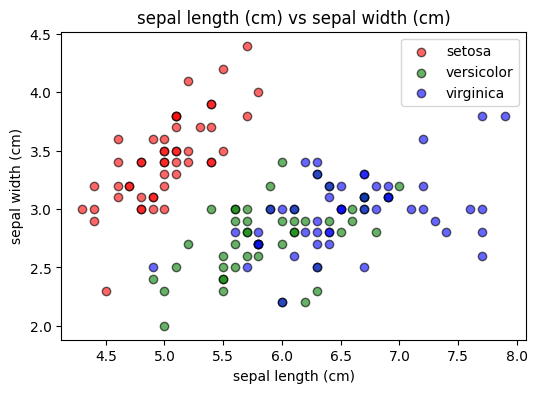

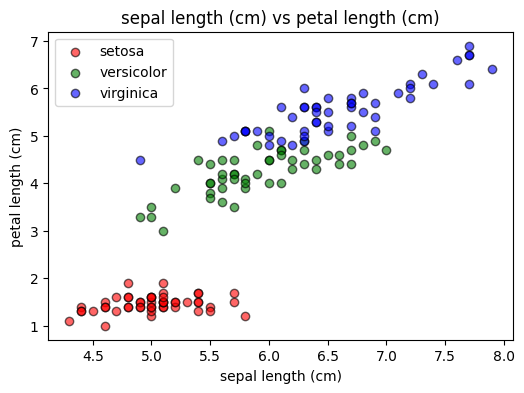

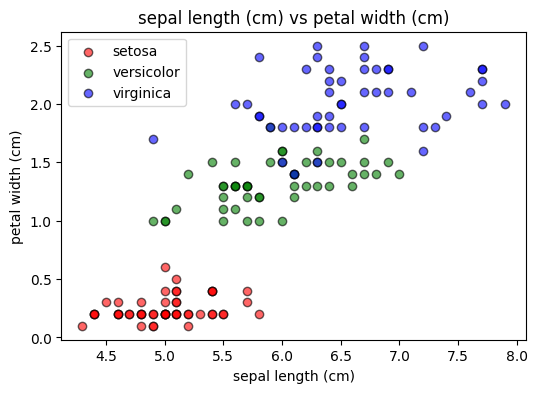

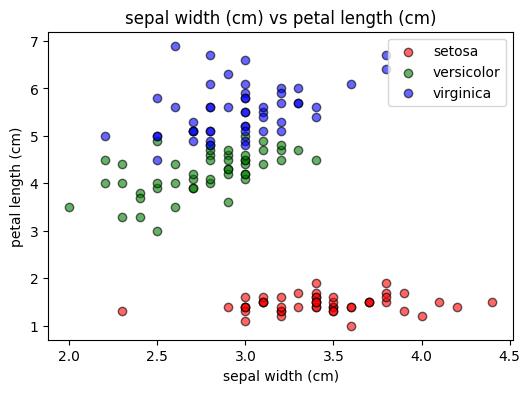

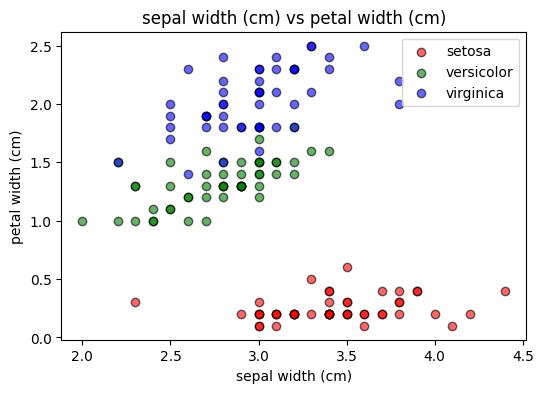

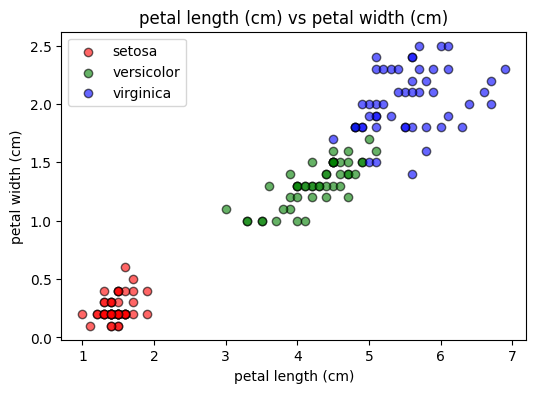

Selecionamos petal length e petal width dentre:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
#your code for your plot goes here
feature_names = datasets.load_iris().feature_names

def plot_feature_pairs(X, y):
    target_names =  datasets.load_iris().target_names
    colors = ['red', 'green', 'blue']
    
    for i in range(4):
        for j in range(i+1, 4):
            plt.figure(figsize=(6, 4))
            for t, color in enumerate(colors):
                idx = y == t
                plt.scatter(X[idx, i], X[idx, j], label=target_names[t], color=color, alpha=0.6, edgecolor='k')
            plt.xlabel(feature_names[i])
            plt.ylabel(feature_names[j])
            plt.title(f'{feature_names[i]} vs {feature_names[j]}')
            plt.legend()
            plt.show()

plot_feature_pairs(X, y)
print(f"Selecionamos petal length e petal width entre:  {feature_names}")

Create a function to predict the class of a set of points given a "training set" using KNN. (check function mode from scipy.stats and numpy documentation). Do not use any loop.

In [121]:
from scipy.stats import mode

def myKNN(X_test, X_train, y_train, k):
    """
    Perform k-nearest neighbors (KNN) prediction on a test set using a training set.

    Parameters
    ----------
    X_test : pandas.DataFrame
        Test set features dataframe with shape (n_samples, n_features), where n_samples is the number of samples
        and n_features is the number of features.
    X_train : pandas.DataFrame
        Training set features dataframe with shape (n_samples, n_features), where n_samples is the number of samples
        and n_features is the number of features.
    y_train : pandas.Series
        Training set target values with shape (n_samples,).
    k : int
        Number of nearest neighbors to consider in the KNN algorithm.

    Returns
    -------
    y_pred : numpy.ndarray
        Predicted target values for the test set using the KNN algorithm.
    """
    def predict_point(point):
        """
        Predict the label for a single data point using KNN algorithm.

        Parameters
        ----------
        point : numpy.ndarray
            Data point to be predicted.

        Returns
        -------
        label : int
            Predicted label for the data point.
        """
    
        # distances = [euclidean_dist(point, X_train.iloc[n].values) for n in range(len(X_train))] --- REALLY SLOW IMPLEMENTATION
        
        distances = np.sqrt(np.sum((X_train - point) ** 2, axis=1)) #Faster implementation, making euclidean_dist function useless. Calculate Euclidean distances for the whole dataset

        indices = np.argsort(distances)[:k] # Get indices of k nearest neighbors

        labels = [y_train[ind] for ind in indices] # Get labels of k nearest neighbors
        
        return np.bincount(labels).argmax()  # Return the most frequent label among the neighbors
    
    #  Convert y_train to list
    y_train = y_train.tolist()
    
    # Make predictions for each data point in X_test using KNN algorithm
    y_pred = [predict_point(point) for point in X_test]
    
    return np.array(y_pred)

Test your function! Make sure that you play using datapoints that are not in Xtrain

Divide your dataset into training, testing and validation set. Given the simplicity of this dataset, set the train set size to 40% of the dataset (see model_selection.train_test_split() function you imported previously)

In [122]:
#your code here
from sklearn.model_selection import train_test_split

X_train, X_test_val, y_train, y_test_val = train_test_split(X[:,2:], y, train_size=0.40, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)

Create a function to compute the overall accuracy, and the accuracy per class of the predictions

In [123]:
def acc(pred, target):
    # Acurácia geral
    overall_accuracy = np.count_nonzero(pred == target)  / len(target)

    # Acurácia por classe
    class_accuracies = []
    for cls in np.unique(target):
        cls_mask = (target == cls)
        class_accuracy = np.mean(pred[cls_mask] == target[cls_mask])
        class_accuracies.append(class_accuracy)

    return overall_accuracy, *class_accuracies

Use your train and validation sets to define K by observing the overall accuracy. Make a barplot to compare the overall accuracy for different Ks

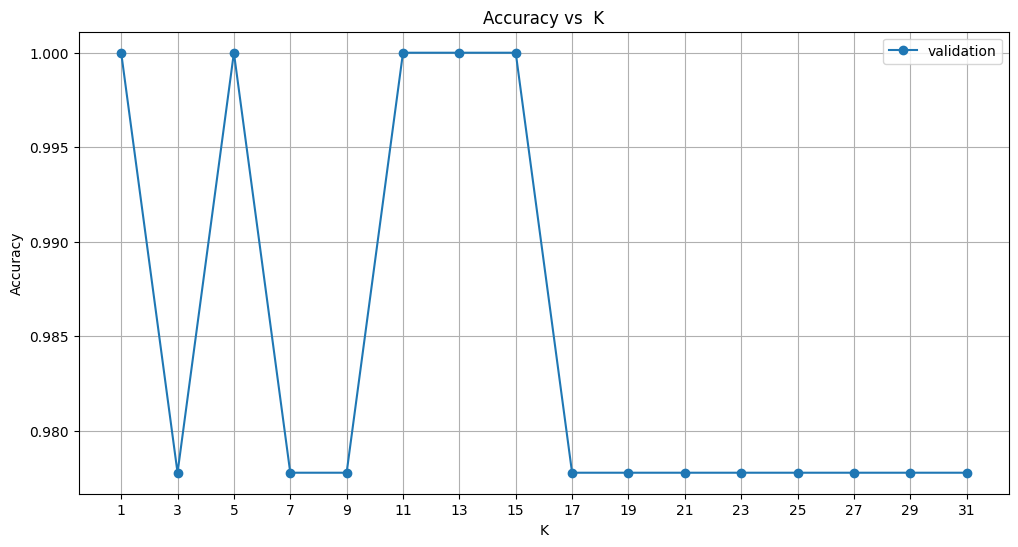

In [124]:
#your code goes here
accuracies = []

# Valores de K a serem testados
K_values = list(range(1, 32, 2))

for k in K_values:
    preds_val = myKNN(X_val, X_train, y_train, k)
    acc_total, _, _, _ = acc(preds_val, y_val)
    accuracies.append(acc_total)
    
best_K = K_values[accuracies.index(max(accuracies))]

# Plota a acurácia do conjunto de validação em relação aos valores de K
plt.figure(figsize=(12, 6))
plt.plot(K_values,  accuracies, marker='o', label='validation')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy vs  K')
plt.xticks(K_values)
plt.legend()
plt.grid(True)
plt.show()

Joint the train set with validation, to predict for the test set. Use a bar plot to show the overall accuraccy an the accuracy per class

In [127]:
#your code goes here
X_train_final = np.vstack((X_train, X_val))
y_train_final = np.hstack((y_train, y_val))

preds_test = myKNN(X_test, X_train, y_train, k)
acc_total, acc_setosa, acc_versicolor, acc_virginica = acc(preds_test, y_test)
print(f"Overall Accuracy: {acc_total:.2f}")
print(f"Accuracy per Class:")
print(f"  - Setosa: {acc_setosa:.2f}")
print(f"  - Versicolor: {acc_versicolor:.2f}")
print(f"  - Virginica: {acc_virginica:.2f}")

Overall Accuracy: 0.96
Accuracy per Class:
  - Setosa: 0.94
  - Versicolor: 1.00
  - Virginica: 0.90


Plot the training points using circles and using different colors for different classes. Plot the test points using stars, use different colors for different predicted classes. Add legend, title and labels for the x and y axis. You chose which features to use for the 2D plot.

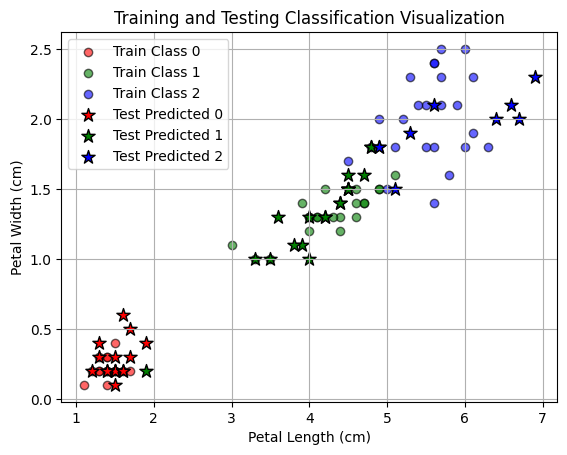

In [ ]:
#your code goes here
colors = np.array(['red', 'green', 'blue'])

# Plot training points
for cls in np.unique(y_train):
    cls_mask = y_train == cls
    plt.scatter(X_train[cls_mask, 0], X_train[cls_mask, 1], 
                c=colors[cls], label=f'Train Class {cls}', 
                marker='o', edgecolor='k', alpha=0.6)

# Plot test points
for cls in np.unique(preds_test):
    cls_mask = preds_test == cls
    plt.scatter(X_test[cls_mask, 0], X_test[cls_mask, 1], 
                c=colors[cls], label=f'Test Predicted {cls}', 
                marker='*', s=100, edgecolor='k')

# Add labels, title, and legend
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Training and Testing Classification Visualization')
plt.legend()
plt.grid(True)
plt.show()
